In [1]:
import os
import librosa
import math
import json
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
DATASET_PATH="C:\\Users\\SAI KARTHIK\\Downloads\\archive (10)\\Data\\genres_original"
JSON_PATH="data_10.json"
SAMPLE_RATE=22050
duration = 10 #seconds
SAMPLES_PER_TRACK=SAMPLE_RATE * duration
def  save_mfcc(dataset_path, json_path, n_mfcc=13, n_fft=2048, hop_length=512, num_segments=5):
    data={
        "mapping":[],
        "mfcc":[],
        "labels":[]
    }
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mfcc_vectors_per_segments=math.ceil(num_samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("/")
            semantic_label=dirpath_components[-1]
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            for f in filenames:
                file_path = os.path.join(dirpath,f)
                signal, sr=librosa.load(file_path, sr=SAMPLE_RATE)
                #process segments extracting mfcc and storing data
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    mfcc = librosa.feature.mfcc(y=signal[start_sample:finish_sample],
                                               sr=SAMPLE_RATE,
                                               n_fft=n_fft,
                                               n_mfcc=n_mfcc,
                                               hop_length=hop_length)
                    mfcc = mfcc.T
                    if len(mfcc)==expected_num_mfcc_vectors_per_segments:
                        data["mfcc"].append(mfcc.tolist())
                        data["labels"].append(i-1)
                        print("{}, segment:{}".format(file_path, s))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)
        
if __name__=="__main__":
    save_mfcc(DATASET_PATH, JSON_PATH, num_segments=10)
                
                 
            


Processing C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00000.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\arch

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00008.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00009.wav, segment:8
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00017.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00018.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00018.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00018.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00018.wav, segment:3
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00026.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00027.wav, segment:8
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00036.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00037.wav, segment:0
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00045.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00045.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00045.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00045.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00046.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00054.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00063.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00064.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00064.wav, segment:1
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00072.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00072.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00072.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00072.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00073.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00082.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00091.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00092.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00092.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00092.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\blues\blues.00092.wav, segment:3
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00000.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00000.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00000.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00000.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00001.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00001.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00001.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00001.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00001.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00008.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00008.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00008.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00009.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00017.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00017.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00017.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00017.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00017.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00018.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00018.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00018.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00018.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00026.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00026.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00026.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00026.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00026.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00027.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00027.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00027.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00027.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00035.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00043.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00043.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00043.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00043.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00043.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00044.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00044.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00044.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00044.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00052.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00060.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00060.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00061.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00069.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00077.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00078.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00085.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00086.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00093.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00093.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\classical\classical.00094.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Da

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00002.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00002.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00002.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00003.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00011.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00011.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00011.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00012.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00020.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00028.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00028.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00028.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00029.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00037.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00045.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00045.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00045.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00045.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00045.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00046.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00046.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00046.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00046.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00053.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00053.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00054.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00061.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00062.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00070.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00078.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00086.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00086.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00086.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00086.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00086.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00087.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00087.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00087.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00087.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00095.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00095.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00095.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.00096.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\country\country.0

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00004.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00005.wav, segment:8
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00013.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00014.wav, segment:8
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00023.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00023.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00023.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00024.wav, segment:6
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00032.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00033.wav, segment:0
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00040.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00040.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00040.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00040.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00040.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00041.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00041.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00041.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00041.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00041.wav, segment:4
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00050.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00058.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00058.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00058.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00058.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00059.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00067.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00067.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00067.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00067.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00068.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00076.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00077.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00077.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00077.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00077.wav, segment:3
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00086.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00087.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00087.wav, segment:1
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00095.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00095.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\disco\disco.00096.wav, segment:7
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00005.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00006.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00006.wav, segment:1


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00013.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00013.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00014.wav, segment:7


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00022.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00023.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00023.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00023.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00023.wav, segment:3


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00031.wav, segment:9


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00040.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00040.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00040.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00040.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00040.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00041.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00041.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00041.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00041.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00041.wav, segment:4


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00049.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00050.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00050.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00050.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00050.wav, segment:3


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00058.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00058.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00058.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00058.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00059.wav, segment:5


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00067.wav, segment:9


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00075.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00076.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00076.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00076.wav, segment:2


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00083.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00083.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00083.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00083.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00083.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00084.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00084.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00084.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00084.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00084.wav, segment:4


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00092.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00092.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00092.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00092.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\hiphop\hiphop.00093.wav, segment:5


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00001.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00001.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00001.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00001.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00001.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00002.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00002.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00002.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00002.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00002.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00011.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00011.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00011.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00011.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00012.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00020.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00020.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00020.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00021.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00029.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00029.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00029.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00030.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00038.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00038.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00038.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00038.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00039.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00048.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00048.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00048.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00048.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00048.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00049.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00049.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00049.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00049.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00049.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00058.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00059.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00059.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00059.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00059.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00067.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00068.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00068.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00068.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00076.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00076.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00076.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00076.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00077.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00085.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00086.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00086.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00086.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00095.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00096.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\jazz\jazz.00096.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00003.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00003.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00003.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00003.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00004.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00012.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00013.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00013.wav, segment:1
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00021.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00029.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00030.wav, segment:8
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00038.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00039.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00039.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00039.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00039.wav, segment:3
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00047.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00047.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00047.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00047.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00048.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00056.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00056.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00056.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00056.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00057.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00065.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00065.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00065.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00065.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00066.wav, segment:5
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00074.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00083.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\metal\metal.00092.wav, segment:9
C:\Users\SAI KARTHIK

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00000.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00001.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00001.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00001.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00010.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00019.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00029.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00037.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00038.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00046.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00046.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00047.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00056.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00057.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00057.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00057.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00057.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00065.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00066.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00066.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00074.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00075.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00084.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00085.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00085.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\pop\pop.00093.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_orig

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00002.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00002.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00002.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00002.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00002.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00003.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00003.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00003.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00003.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00003.wav, segment:4


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00010.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00010.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00011.wav, segment:7


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00019.wav, segment:9


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00027.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00028.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00028.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00028.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00028.wav, segment:3


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00036.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00036.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00037.wav, segment:7


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00045.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00045.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00045.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00045.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00045.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00046.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00046.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00046.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00046.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00046.wav, segment:4


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00053.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00053.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00053.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00054.wav, segment:6


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00062.wav, segment:9


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00070.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00071.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00071.wav, segment:1


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00078.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00078.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00078.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00078.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00078.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00079.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00079.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00079.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00079.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00079.wav, segment:4


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00086.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00086.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00086.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00087.wav, segment:6


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\reggae\reggae.00095.wav, segment:9


C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00003.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00004.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00004.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00004.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00013.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00022.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00022.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00023.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00032.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00032.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00032.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00032.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00033.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00041.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00041.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00042.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00051.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00060.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00060.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00061.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00070.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00071.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00071.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00071.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00079.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00079.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00079.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00079.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00080.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00089.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00090.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00090.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00097.wav, segment:9
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:0
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:1
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:2
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:3
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:4
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:5
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:6
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:7
C:\Users\SAI KARTHIK\Downloads\archive (10)\Data\genres_original\rock\rock.00098.wav, segment:8
C:\Users\SAI KARTHIK\Downloads\archive (

C:\Users\SAI KARTHIK\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 130, 64)             │          19,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 57,802 (225.79 KB)

 Trainable params: 57,802 (225.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 30s 124ms/step - accuracy: 0.1222 - loss: 2.2964 - val_accuracy: 0.3071 - val_loss: 2.1549
Epoch 2/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.3042 - loss: 2.0931 - val_accuracy: 0.3865 - val_loss: 1.8696
Epoch 3/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 128ms/step - accuracy: 0.3708 - loss: 1.8415 - val_accuracy: 0.4092 - val_loss: 1.6901
Epoch 4/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 126ms/step - accuracy: 0.4331 - loss: 1.6758 - val_accuracy: 0.4646 - val_loss: 1.5696
Epoch 5/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.4550 - loss: 1.5789 - val_accuracy: 0.4800 - val_loss: 1.4996
Epoch 6/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 122ms/step - accuracy: 0.4794 - loss: 1.4860 - val_accuracy: 0.5093 - val_loss: 1.4244
Epoch 7/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 23s 123ms/step - accuracy: 0.5146 - loss: 1.4055 - val_accuracy: 0.5180 - val_loss: 1.3834
Epoch 8/30
188/188 ━━━━━━━━━━━━━━━━━━━━ 24s 127ms/step - accuracy: 0.5347 - loss: 1

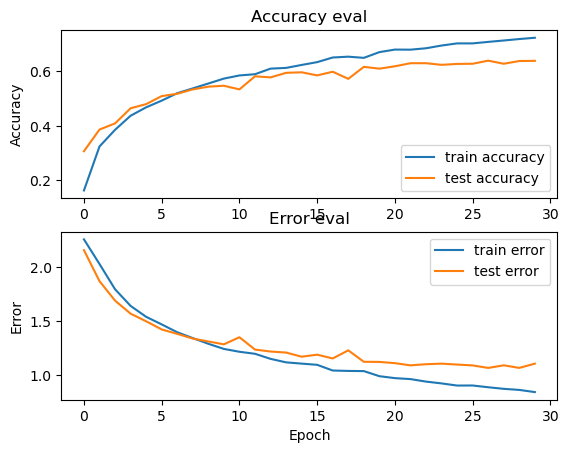

79/79 - 4s - 46ms/step - accuracy: 0.6203 - loss: 1.1519

Test accuracy: 0.6203444004058838


In [3]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt

DATA_PATH = "data_10.json"


def load_data(data_path):
    """Loads training dataset from json file.

        :param data_path (str): Path to json file containing data
        :return X (ndarray): Inputs
        :return y (ndarray): Targets
    """

    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mfcc"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    """Plots accuracy/loss for training/validation set as a function of the epochs

        :param history: Training history of model
        :return:
    """

    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates RNN-LSTM model

    :param input_shape (tuple): Shape of input set
    :return model: RNN-LSTM model
    """

    # build network topology
    model = keras.Sequential()

    # 2 LSTM layers
    model.add(keras.layers.LSTM(64, input_shape=input_shape, return_sequences=True))
    model.add(keras.layers.LSTM(64))

    # dense layer
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.2))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2]) # 130, 13
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

In [4]:
model.save('Model_LSTMsave.keras')

def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    # add an axis to input sets
    X_train = X_train[..., np.newaxis]
    X_validation = X_validation[..., np.newaxis]
    X_test = X_test[..., np.newaxis]

    return X_train, X_validation, X_test, y_train, y_validation, y_test


def build_model(input_shape):
    """Generates CNN model

    :param input_shape (tuple): Shape of input set
    :return model: CNN model
    """

    # build network topology
    model = keras.Sequential()

    # 1st conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 2nd conv layer
    model.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # 3rd conv layer
    model.add(keras.layers.Conv2D(32, (2, 2), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    # flatten output and feed it into dense layer
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.3))

    # output layer
    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


def predict(model, X, y):
    """Predict a single sample using the trained model

    :param model: Trained classifier
    :param X: Input data
    :param y (int): Target
    """

    # add a dimension to input data for sample - model.predict() expects a 4d array in this case
    X = X[np.newaxis, ...] # array shape (1, 130, 13, 1)

    # perform prediction
    prediction = model.predict(X)

    # get index with max value
    predicted_index = np.argmax(prediction, axis=1)

    print("Target: {}, Predicted label: {}".format(y, predicted_index))


if __name__ == "__main__":

    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1)
    model = build_model(input_shape)

    # compile model
    optimiser = keras.optimizers.Adam(learning_rate=0.0001)
    model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    model.summary()

    # train model
    history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=30)

    # plot accuracy/error for training and validation
    plot_history(history)

    # evaluate model on test set
    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
    print('\nTest accuracy:', test_acc)

    # pick a sample to predict from the test set
    X_to_predict = X_test[100]
    y_to_predict = y_test[100]

    # predict sample
    predict(model, X_to_predict, y_to_predict)